<a href="https://colab.research.google.com/github/sonalgaiwad/project-6/blob/main/project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_path = "/content/drive/MyDrive/rossmann-sales-forecasting"

folders = [
    "data/raw",
    "data/processed",
    "notebooks",
    "models",
    "app"
]

for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print("Folder structure created successfully")

Folder structure created successfully


In [ ]:
#  Libraries

import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# # Load train, test, and store data from Google Drive

train_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/train.csv"
test_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/test.csv"
store_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/store.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
store = pd.read_csv(store_path)

print("CSV files loaded successfully")

#  # Merge store info with train and test datasets

train_merged = pd.merge(train, store, on="Store", how="left")
test_merged = pd.merge(test, store, on="Store", how="left")

print("Train and Test merged with store info")


# Features and Target Selection

# Customers column is NOT present in test, so remove from features
features = ['Store', 'DayOfWeek', 'Open', 'Promo']
target = 'Sales'

# Fill NaN values
X_train = train_merged[features].fillna(0)
y_train = train_merged[target].fillna(0)

X_test = test_merged[features].fillna(0)


# Train RandomForest Model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully")


#  Predict on Test Data

test_merged['Predicted_Sales'] = model.predict(X_test)

print("Prediction on test data done")


# Save Submission CSV

submission = test_merged[['Id', 'Predicted_Sales']]
submission.rename(columns={'Predicted_Sales': 'Sales'}, inplace=True)

submission_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/processed/submission.csv"
submission.to_csv(submission_path, index=False)

print(f"Submission CSV saved at: {submission_path}")

#  Quick Check

submission.head()

/tmp/ipython-input-2636772939.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


CSV files loaded successfully
Train and Test merged with store info
Model trained successfully
Prediction on test data done


/tmp/ipython-input-2636772939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={'Predicted_Sales': 'Sales'}, inplace=True)


Submission CSV saved at: /content/drive/MyDrive/rossmann-sales-forecasting/data/processed/submission.csv


,Id,Sales
0,1,4957.516626
1,2,7984.346005
2,3,9460.339714
3,4,7218.961071
4,5,6770.261416


In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# For Deep Learning placeholder
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Google Drive paths
train_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/train.csv"
test_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/test.csv"
store_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/raw/store.csv"

# Load
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
store = pd.read_csv(store_path)

print("CSV files loaded successfully")


train_merged = pd.merge(train, store, on="Store", how="left")
test_merged = pd.merge(test, store, on="Store", how="left")

print("Train and Test merged with store info")

/tmp/ipython-input-727023101.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


CSV files loaded successfully
Train and Test merged with store info


In [ ]:
# Convert Date column
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
test_merged['Date'] = pd.to_datetime(test_merged['Date'])

# Create new features
for df in [train_merged, test_merged]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['IsWeekend'] = df['DayOfWeek'].isin([6,7]).astype(int)
    df['StateHolidayFlag'] = (df['StateHoliday'] != '0').astype(int)
    df['SchoolHolidayFlag'] = df['SchoolHoliday'].fillna(0).astype(int)

print("New features created successfully")

New features created successfully


In [ ]:
features_extended = ['Store', 'DayOfWeek', 'Open', 'Promo',
                     'Year', 'Month', 'Day', 'WeekOfYear',
                     'IsWeekend', 'StateHolidayFlag', 'SchoolHolidayFlag']

# Training
X_train = train_merged[features_extended].fillna(0)
y_train = train_merged['Sales']

X_test = test_merged[features_extended].fillna(0)

model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("RandomForest trained with new features")

test_merged['Predicted_Sales'] = model.predict(X_test)
print("Prediction on test data done")

RandomForest trained with new features
Prediction on test data done


In [ ]:
submission = test_merged[['Id', 'Predicted_Sales']].rename(columns={'Predicted_Sales':'Sales'})
submission_path = "/content/drive/MyDrive/rossmann-sales-forecasting/data/processed/submission_final.csv"
submission.to_csv(submission_path, index=False)

print(f"Submission CSV saved at: {submission_path}")
submission.head()

Submission CSV saved at: /content/drive/MyDrive/rossmann-sales-forecasting/data/processed/submission_final.csv


,Id,Sales
0,1,4686.10
1,2,7726.76
2,3,9504.40
3,4,7819.04
4,5,7440.16


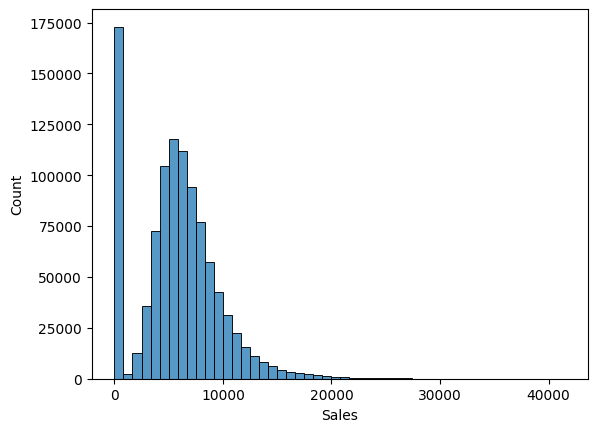

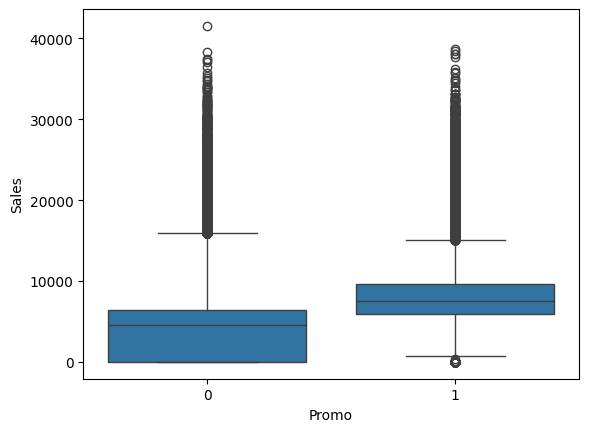

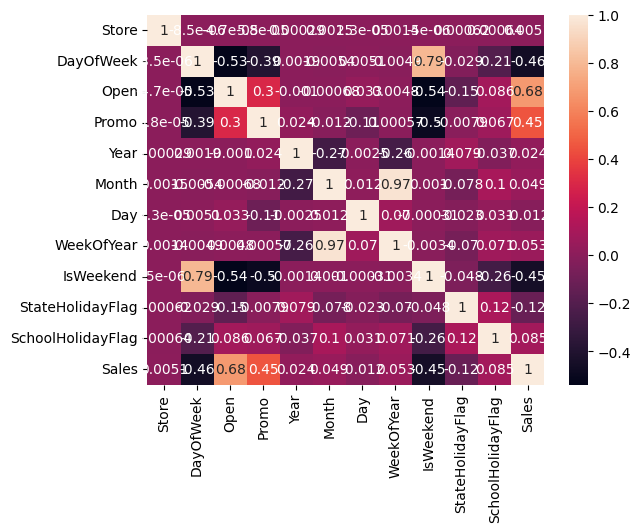

In [ ]:
# Sales distribution
sns.histplot(train_merged['Sales'], bins=50)
plt.show()

# Sales vs Promo
sns.boxplot(x='Promo', y='Sales', data=train_merged)
plt.show()

# Correlation heatmap
sns.heatmap(train_merged[features_extended + ['Sales']].corr(), annot=True)
plt.show()

In [ ]:
import logging

# LOGGING SETUP


logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

logging.info("Notebook started successfully")

# Handle missing CompetitionDistance
train_merged['CompetitionDistance'].fillna(
    train_merged['CompetitionDistance'].median(), inplace=True)

test_merged['CompetitionDistance'].fillna(
    train_merged['CompetitionDistance'].median(), inplace=True)

logging.info("Missing values handled")

/tmp/ipython-input-59484204.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged['CompetitionDistance'].fillna(
/tmp/ipython-input-59484204.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

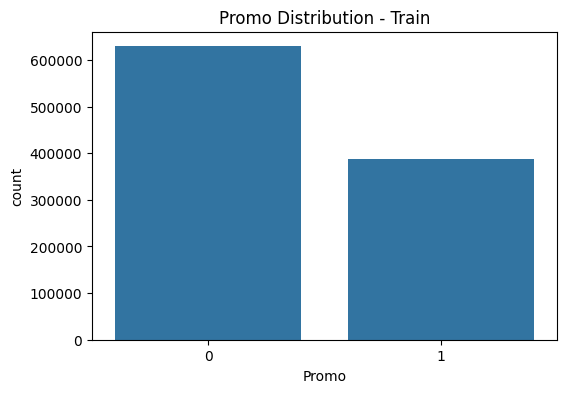

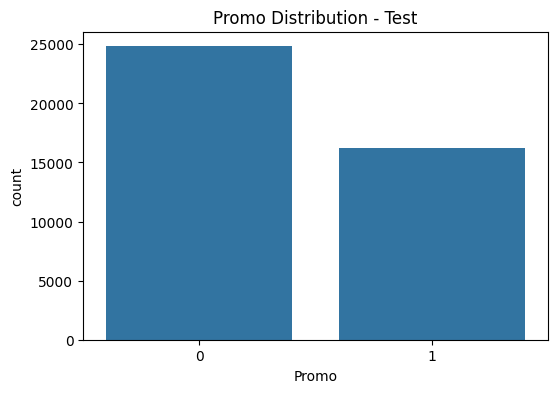

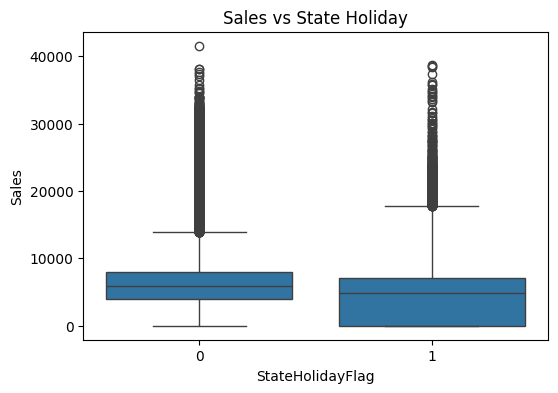

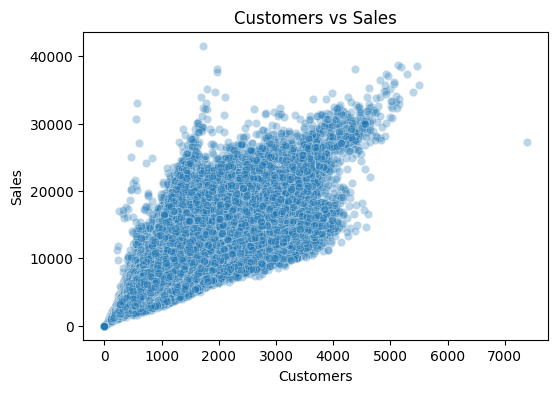

,Customers,Sales
Customers,1.000000,0.894711
Sales,0.894711,1.000000


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Promo', data=train_merged)
plt.title("Promo Distribution - Train")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Promo', data=test_merged)
plt.title("Promo Distribution - Test")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='StateHolidayFlag', y='Sales', data=train_merged)
plt.title("Sales vs State Holiday")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Customers', y='Sales', data=train_merged, alpha=0.3)
plt.title("Customers vs Sales")
plt.show()

train_merged[['Customers','Sales']].corr()

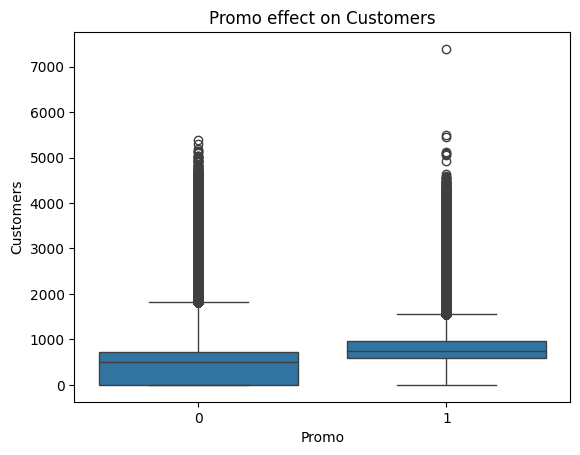

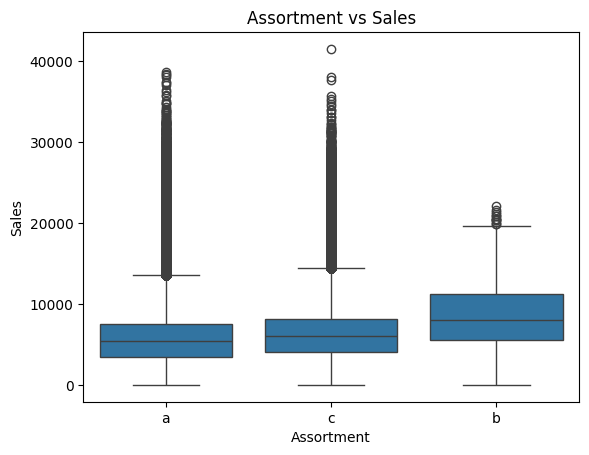

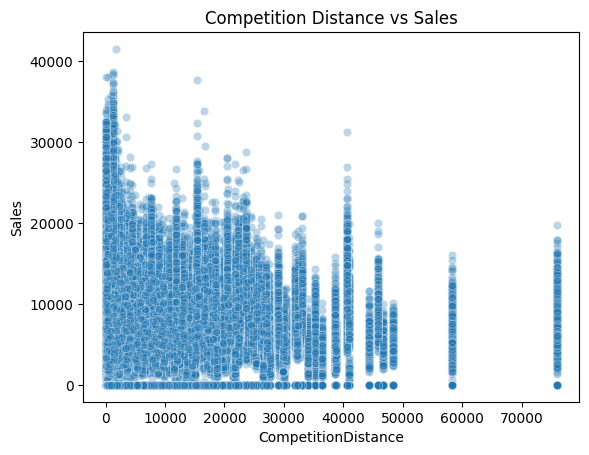

In [ ]:
sns.boxplot(x='Promo', y='Customers', data=train_merged)
plt.title("Promo effect on Customers")
plt.show()

sns.boxplot(x='Assortment', y='Sales', data=train_merged)
plt.title("Assortment vs Sales")
plt.show()

sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_merged, alpha=0.3)
plt.title("Competition Distance vs Sales")
plt.show()

In [ ]:
for df in [train_merged, test_merged]:
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

    from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

In [ ]:
features = [
    'Store','DayOfWeek','Open','Promo','CompetitionDistance',
    'IsWeekend','StateHolidayFlag','SchoolHolidayFlag',
    'IsMonthStart','IsMonthEnd'
]

X = train_merged[features]
y = train_merged['Sales']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1))
])

pipeline.fit(X, y)
logging.info("Pipeline model trained")

In [ ]:
preds = pipeline.predict(X)
mae = mean_absolute_error(y, preds)
print("MAE:", mae)

importances = pipeline.named_steps['model'].feature_importances_

pd.Series(importances, index=features).sort_values(ascending=False)

import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
model_path = f"/content/drive/MyDrive/rossmann-sales-forecasting/models/rf_{timestamp}.pkl"

joblib.dump(pipeline, model_path)
logging.info(f"Model saved at {model_path}")

MAE: 604.5199588040233


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
store_df = train_merged[train_merged['Store'] == 1]
store_df = store_df.sort_values('Date')

sales = store_df['Sales'].values


result = adfuller(sales)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -4.368104368168491
p-value: 0.00033788346141425444


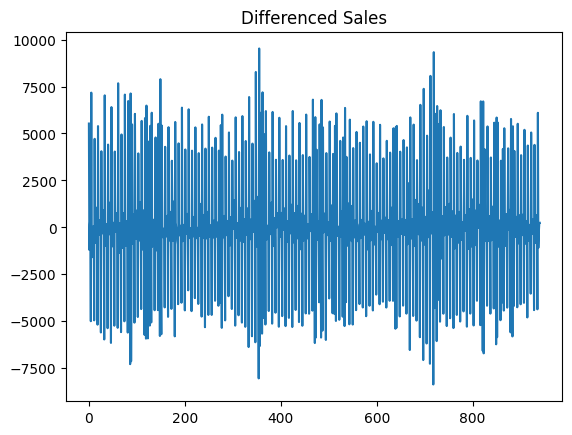

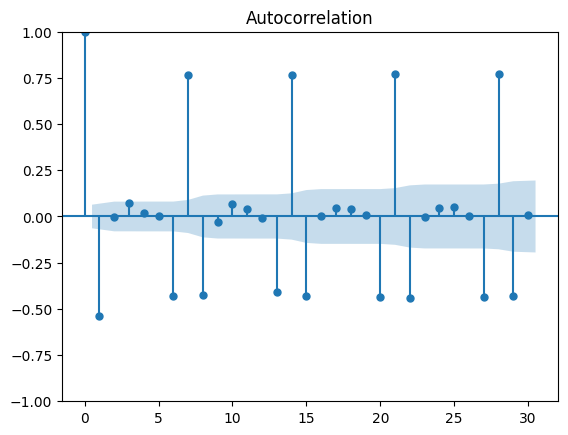

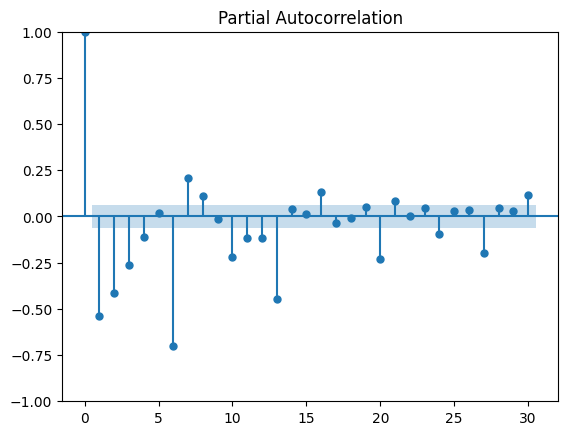

In [ ]:
sales_diff = np.diff(sales)

plt.plot(sales_diff)
plt.title("Differenced Sales")
plt.show()

plot_acf(sales_diff, lags=30)
plt.show()

plot_pacf(sales_diff, lags=30)
plt.show()

In [ ]:
def create_data(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_data(sales)


scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1,1))

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_scaled.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(
    X_scaled,
    y_scaled,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.1930 - val_loss: 0.1575
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1897 - val_loss: 0.1571
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1814 - val_loss: 0.1535
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1833 - val_loss: 0.1597
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1813 - val_loss: 0.1515
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1757 - val_loss: 0.1515
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1694 - val_loss: 0.1497
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1719 - val_loss: 0.1557
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1848 - val_loss: 0.1473
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1790 - val_loss: 0.1457


In [ ]:
!pip install mlflow

import mlflow
import mlflow.sklearn

mlflow.set_experiment("Rossmann Sales Forecasting")

with mlflow.start_run():
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("MAE", mae)

    mlflow.sklearn.log_model(pipeline, "model")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.5 MB/s eta 0:00:00


2026/01/13 06:34:34 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/13 06:34:34 INFO mlflow.store.db.utils: Updating database tables
2026/01/13 06:34:34 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/13 06:34:34 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/13 06:34:34 INFO alembic.runtime.migration: Running 

In [ ]:
!pip install streamlit
!streamlit run /content/drive/MyDrive/rossmann-sales-forecasting/app/aap.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.197.118.151:8501

